---

# Análisis de datos archivo SatisfaccionOnboarding
Por : Christian Vergara Retamal - Benjamín Sánchez Aliste
      

El siguiente archivo fué proporcionado por x perteneciente al equipo/área de x en Haulmer. Los datos dispuestos se obtienen desde el proceso de x con los clientes, en el cuál se detallan las siguientes variables : 

*    Marca temporal:
*    Dirección de correo electrónico:
*    ¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho):
*    ¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho):
*    ¿Nuestro personal fue capaz de resolver sus consultas? ( Nota de 1 a 5, donde 5 es todas):
*    ¿El contenido revisado estuvo acorde a lo esperado?:
*    Si tienes algún comentario o sugerencia, puedes registrarlo aquí:
*    ¿Con quién realizó su capacitación?:
*    ¿Considera que el tiempo empleado en la actividad fue el adecuado?:
*    ¿Que tanto recomendaría esta actividad a un conocido? ( Nota de 1 a 5, donde 5 es Muy Recomendable):




---

## Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

---

## Preparación Ambiente de Trabajo

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Importación y observación del set de datos

In [4]:
# Datos de Encuesta satisfacción onboarding
data = pd.read_csv("/content/drive/MyDrive/Datos/Datos Tesis/satisfaccionOnboarding.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Las columnas del set de datos
data.columns
columnas= data.columns
for i in range(len(columnas)):
  print("*   ",columnas[i]+":")


*    Marca temporal:
*    Dirección de correo electrónico:
*    ¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho):
*    ¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho):
*    ¿Nuestro personal fue capaz de resolver sus consultas? ( Nota de 1 a 5, donde 5 es todas):
*    ¿El contenido revisado estuvo acorde a lo esperado?:
*    Si tienes algún comentario o sugerencia, puedes registrarlo aquí:
*    ¿Con quién realizó su capacitación?:
*    ¿Considera que el tiempo empleado en la actividad fue el adecuado?:
*    ¿Que tanto recomendaría esta actividad a un conocido? ( Nota de 1 a 5, donde 5 es Muy Recomendable):


In [6]:
# Muestra del conjunto de datos
data.sample(5)

,Marca temporal,Dirección de correo electrónico,"¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho)","¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho)","¿Nuestro personal fue capaz de resolver sus consultas? ( Nota de 1 a 5, donde 5 es todas)",¿El contenido revisado estuvo acorde a lo esperado?,"Si tienes algún comentario o sugerencia, puedes registrarlo aquí",¿Con quién realizó su capacitación?,¿Considera que el tiempo empleado en la actividad fue el adecuado?,"¿Que tanto recomendaría esta actividad a un conocido? ( Nota de 1 a 5, donde 5 es Muy Recomendable)"
231,17/01/2022 11:25:45,diegoperezl012@gmail.com,5,5,5,Sí,NaN,Juan Jaspe,Sí,5.0
166,13/12/2021 10:03:20,francisco@standardtech.cl,5,5,5,Sí,NaN,Luis Galáz,Sí,5.0
257,25/01/2022 11:06:33,fjaviervio@chileparamarketing.cl,5,5,5,Sí,NaN,Juan Jaspe,Sí,5.0
145,3/12/2021 9:43:23,fierroselarbolito@gmail.com,5,5,5,Sí,NaN,Luis Galáz,Sí,5.0
58,22/10/2021 9:20:50,contactogomacenter@gmail.com,4,5,5,Sí,NaN,NaN,NaN,NaN


In [7]:
# Cantidad de filas y columnas
print("El dataframe anime consta de {} atributos (columnas) y {} registros (filas)".format(data.shape[1], data.shape[0]))

El dataframe anime consta de 10 atributos (columnas) y 393 registros (filas)


## Análisis descriptivo

In [8]:
# Cantidad de registros por columna y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Marca temporal                                                                                                393 non-null    object 
 1   Dirección de correo electrónico                                                                               393 non-null    object 
 2   ¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho)                     393 non-null    int64  
 3   ¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho)  393 non-null    int64  
 4   ¿Nuestro personal fue capaz de resolver sus consultas? (

In [9]:
# Descripción de los datos numéricos
data.describe()

,"¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho)","¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho)","¿Nuestro personal fue capaz de resolver sus consultas? ( Nota de 1 a 5, donde 5 es todas)","¿Que tanto recomendaría esta actividad a un conocido? ( Nota de 1 a 5, donde 5 es Muy Recomendable)"
count,393.000000,393.000000,393.000000,310.000000
mean,4.877863,4.905852,4.885496,4.851613
std,0.580590,0.547528,0.588684,0.626218
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [11]:
# Descripción de los datos categóricos
data.describe(include = "object")

,Marca temporal,Dirección de correo electrónico,¿El contenido revisado estuvo acorde a lo esperado?,"Si tienes algún comentario o sugerencia, puedes registrarlo aquí",¿Con quién realizó su capacitación?,¿Considera que el tiempo empleado en la actividad fue el adecuado?
count,393,393,393,167,310,310
unique,393,386,24,163,6,10
top,1/09/2021 13:40:28,mangonaranjaycafe@gmail.com,Sí,Muy buena atención,Gonzalo Labarca,Sí
freq,1,2,364,3,72,291


In [10]:
# Verificación de datos nulos por columna
data.isna().sum()

Marca temporal                                                                                                    0
Dirección de correo electrónico                                                                                   0
¿Te encuentras satisfecho con esta actividad? ( Nota de 1 a 5, donde 5 es Muy satisfecho)                         0
¿Cómo valora la atención recibida por parte de nuestro personal? ( Nota de 1 a 5, donde 5 es Muy satisfecho)      0
¿Nuestro personal fue capaz de resolver sus consultas? ( Nota de 1 a 5, donde 5 es todas)                         0
¿El contenido revisado estuvo acorde a lo esperado?                                                               0
Si tienes algún comentario o sugerencia, puedes registrarlo aquí                                                226
¿Con quién realizó su capacitación?                                                                              83
¿Considera que el tiempo empleado en la actividad fue el adecuado?      

## Análisis Univariado de atributos

### Variables numéricas

In [12]:
# Obtención de columnas numéricas del set de datos
columnas_numericas = data.select_dtypes(include = ["float64", "int64"])

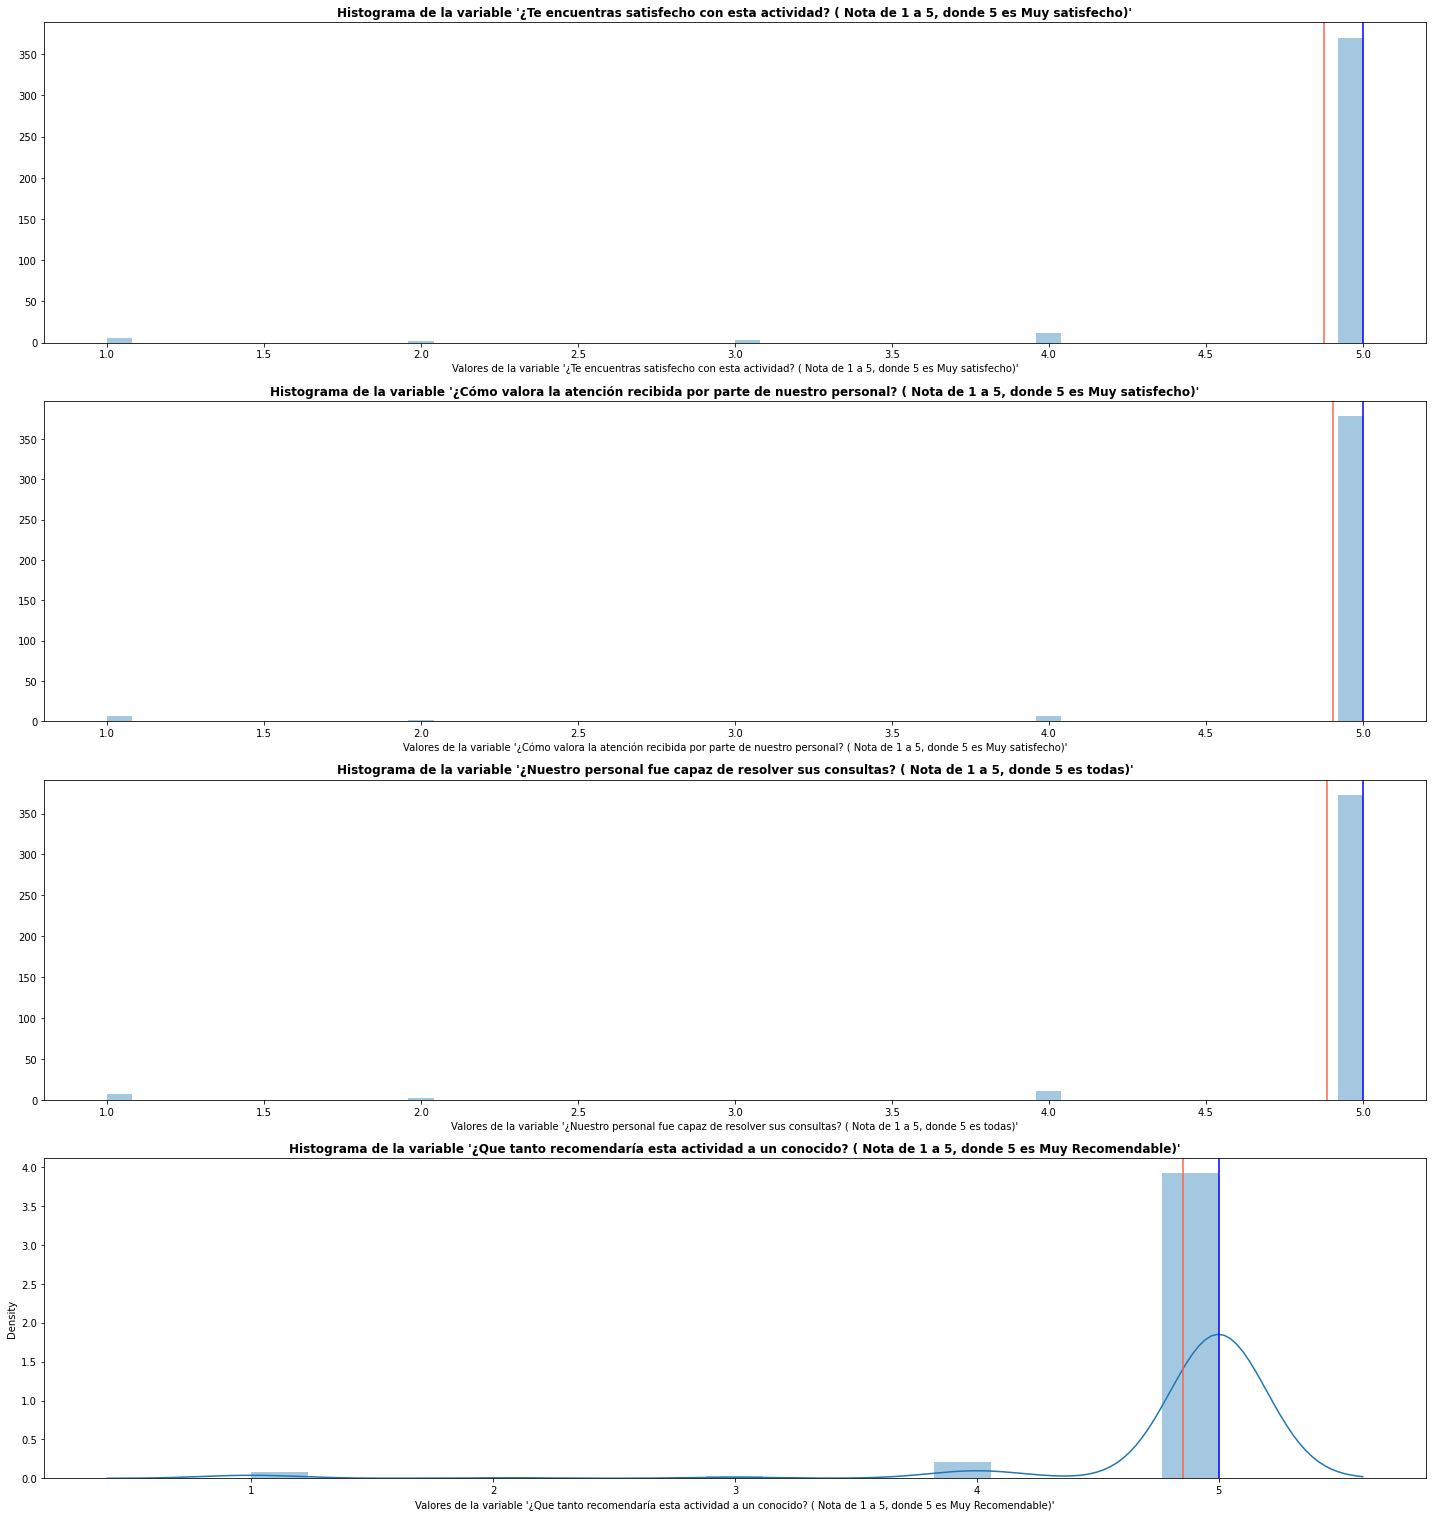

In [13]:
plt.figure(figsize=(20,26))
for index, col in enumerate(columnas_numericas):
    plt.subplot((len(list(columnas_numericas)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if data[col].dtypes == "float64":
        sns.distplot(data[col])
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif data[col].dtypes == "int64":
        sns.distplot(data[col], kde = False, bins = 50)
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

### Variables categóricas

In [14]:
# Creación de función para visualizar frecuencia de valores que puede tomar el respectivo atributo
def plot_freq(df, col): 
  plt.figure(figsize=(10,8))
  aux_dict = df[col].value_counts().to_dict()
  y = list(aux_dict.values())
  plt.barh(*zip(*aux_dict.items()))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.title("Frecuencia de la columnas {}".format(col))
  plt.show()
  plt.tight_layout()

Pregunta encuesta "¿El contenido revisado estuvo acorde a lo esperado?"

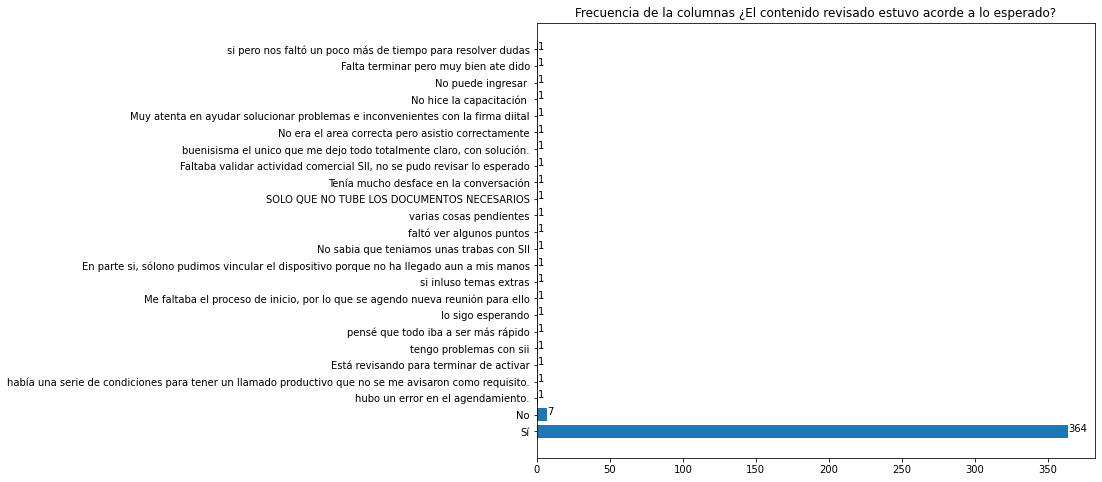

<Figure size 432x288 with 0 Axes>

In [15]:
plot_freq(data, "¿El contenido revisado estuvo acorde a lo esperado?")

#### Pregunta encuesta "¿Con quién realizó su capacitación?"

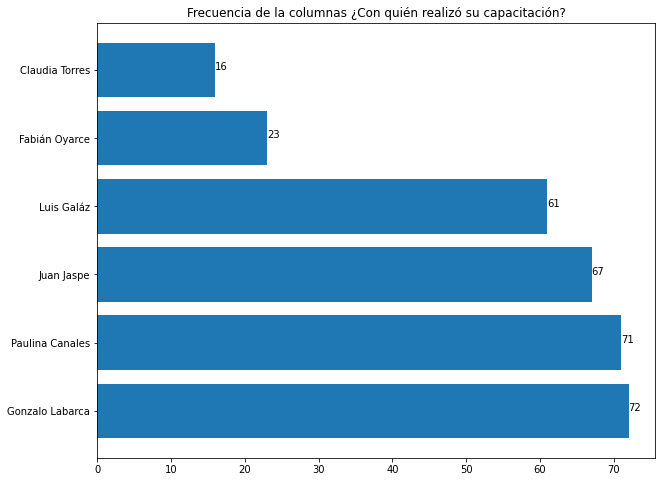

<Figure size 432x288 with 0 Axes>

In [16]:
plot_freq(data, "¿Con quién realizó su capacitación?")

#### Pregunta encuesta "¿Considera que el tiempo empleado en la actividad fue el adecuado?"

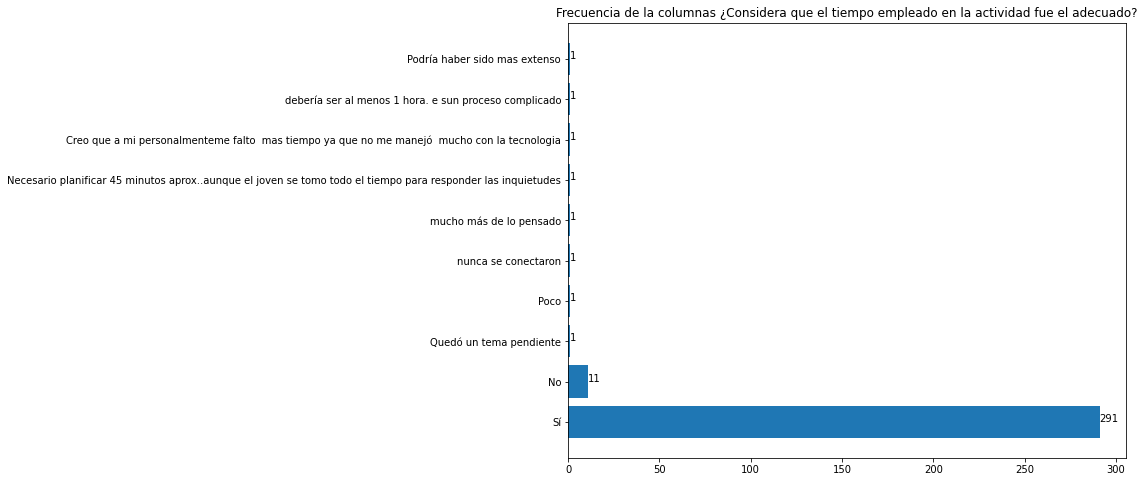

<Figure size 432x288 with 0 Axes>

In [17]:
plot_freq(data, "¿Considera que el tiempo empleado en la actividad fue el adecuado?")